In [1]:
pwd

'C:\\Users\\Prashant\\Downloads\\AV\\Black Belt Workshop\\Machine Learning\\Regression+Classification'

In [2]:
import pandas as pd
import numpy as np

# Boston House Prices Dataset

Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 12 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


In [3]:
df = pd.read_csv(r"BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()  # checking for missing values in the data

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
# 0-0.3 >>> no correlation
# 0.3-0.5 >>> weak correlation
# 0.5-0.7 >>> strong correlation
# 0.7-0.9 >>> very strong corr
# >0.9    >>> you should get suspicious !!! (red flag)

In [15]:
corr_values = df.corr().round(2)
corr_values[abs(corr_values) > 0.6]
# corr_values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,NaN,NaN,NaN
zn,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,1.00,NaN,0.76,NaN,0.64,-0.71,NaN,0.72,NaN,NaN,NaN,NaN
chas,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,0.76,NaN,1.00,NaN,0.73,-0.77,0.61,0.67,NaN,NaN,NaN,NaN
rm,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,-0.61,0.70
age,NaN,NaN,0.64,NaN,0.73,NaN,1.00,-0.75,NaN,NaN,NaN,NaN,NaN,NaN
dis,NaN,0.66,-0.71,NaN,-0.77,NaN,-0.75,1.00,NaN,NaN,NaN,NaN,NaN,NaN
rad,0.63,NaN,NaN,NaN,0.61,NaN,NaN,NaN,1.00,0.91,NaN,NaN,NaN,NaN
tax,NaN,NaN,0.72,NaN,0.67,NaN,NaN,NaN,0.91,1.00,NaN,NaN,NaN,NaN


C:\Users\Prashant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Prashant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


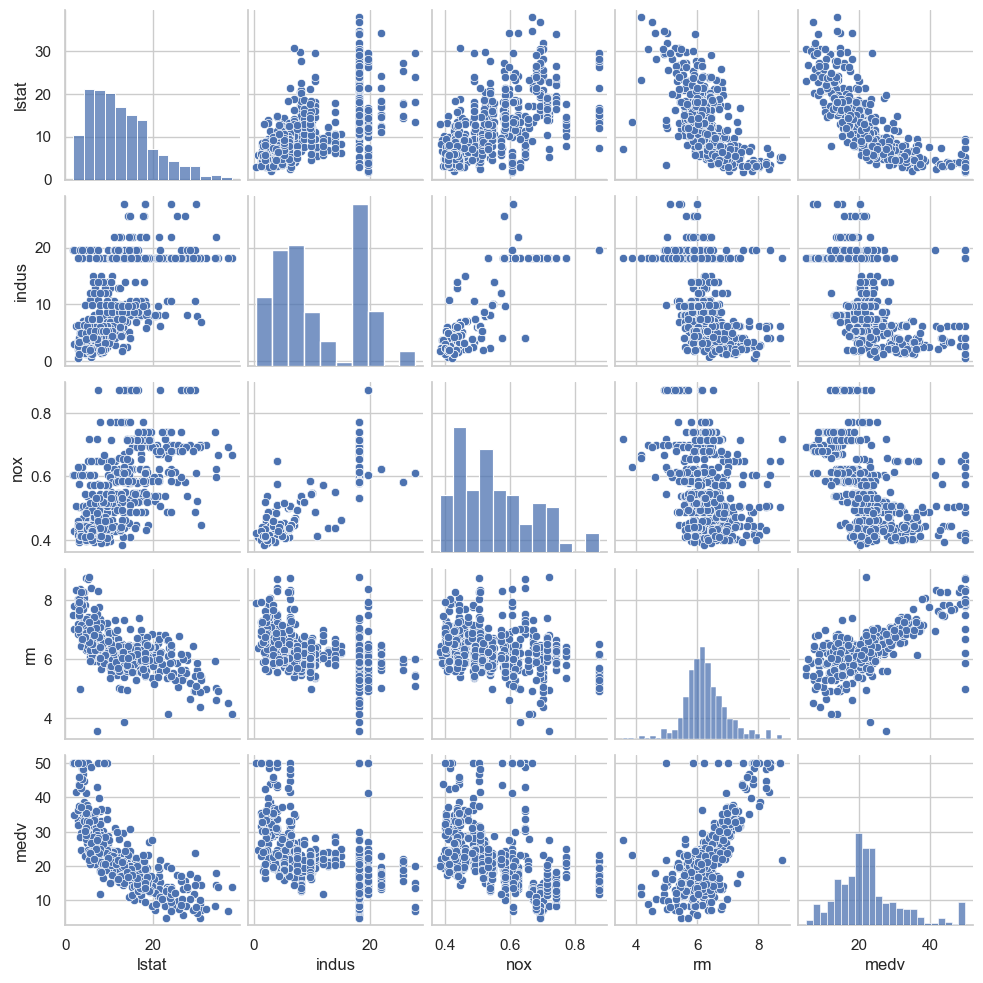

In [9]:
import seaborn as sns
sns.set(style='whitegrid')
cols = ['lstat', 'indus', 'nox', 'rm', 'medv']
sns.pairplot(df[cols], size=2)

<Axes: >

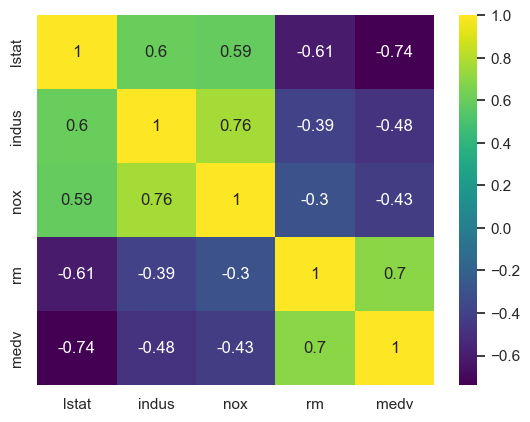

In [14]:
sns.heatmap(df[cols].corr().values, cbar=True, annot=True, yticklabels=cols, xticklabels=cols, cmap='viridis')

In [17]:
X = df['lstat'].values.reshape(-1,1)  # taking only the LSTAT col for feature
y = df['medv'].values.reshape(-1,1)

In [18]:
X[:5]

array([[4.98],
       [9.14],
       [4.03],
       [2.94],
       [5.33]])

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MEDV')

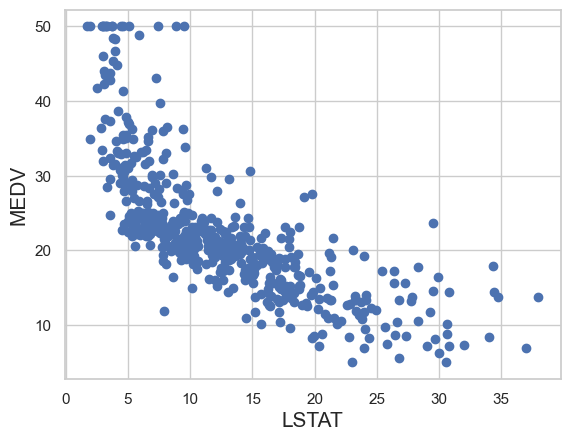

In [31]:
plt.plot(X, y, 'bo')   # scaterplot
plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)

In [21]:
X.shape   # 2D object

(506, 1)

In [22]:
X.ndim

2

<h3> Univariate </h3>

In [23]:
# Split your data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 1), (102, 1))

## Linear Regression Model

In [24]:
X_train.shape

(404, 1)

In [26]:
from sklearn.linear_model import LinearRegression # Import the Estimator

LR = LinearRegression() # Create an instance of the Estimator (class)

LR.fit(X_train, y_train) # if X is 1D, remmeber to make it a column vector

# FIT() METHOD >>>> TRAINS THE ESTIMATOR 
# (means the estimator algo is "learning" the pattern or the relationship between X & y)

LinearRegression()

In [27]:
LR.intercept_, LR.coef_  # model coeff >> slope of the line 

(array([34.83694982]), array([[-0.9665309]]))

In [28]:
LR.score(X_train,y_train) # score of the model in the trianing set

0.5423180734793516

In [29]:
LR.score(X_test,y_test) # score of the model in the test set

0.5429180422970386

In [ ]:
# y^ >>> Predicted value of MEDV from the Model
# y^ = w0*1 + w1*X  >>> this is the equation of the Linear Regression model!
# y^ = 34.83 - 0.96653*LSTAT  >>> This is your Linear Regression Model!

In [32]:
np.polyfit(X_train.flatten(),y_train.flatten(), 2)

array([ 0.04597369, -2.41566473, 43.43630251])

In [33]:
# np.polyfit function expects the X & y to be 1D

p = np.poly1d(np.polyfit(X_train.flatten(),y_train.flatten(), 1))

print(p)
# prints in the format Y^ = mx + c

 
-0.9665 x + 34.84


In [41]:
p = np.poly1d(np.polyfit(X_train.flatten(),y_train.flatten(), 1))
print(p)

 
-0.9665 x + 34.84


In [35]:
LR.score(X_train,y_train)  # R^square value of the Model >> Goodness of Fit  >> Evaluation Metric
# R^square conveys how much of the pattern (variation in the dataset) can be explained by the model

0.5423180734793516

In [36]:
LR.score(X_test,y_test)

0.5429180422970386

In [39]:
y_test[:5]

array([[23.6],
       [32.4],
       [13.6],
       [22.8],
       [16.1]])

In [38]:
y_pred = LR.predict(X_test)  # this is how you get the predictions from the LR Model
y_pred[:5]

array([[26.09951047],
       [31.42509574],
       [17.37173642],
       [29.50169924],
       [18.14496114]])

In [42]:
p(X_test[:5])   # this is how you get the predictions from the NUMPY POLYFIT FUNCTION

array([[26.09951047],
       [31.42509574],
       [17.37173642],
       [29.50169924],
       [18.14496114]])

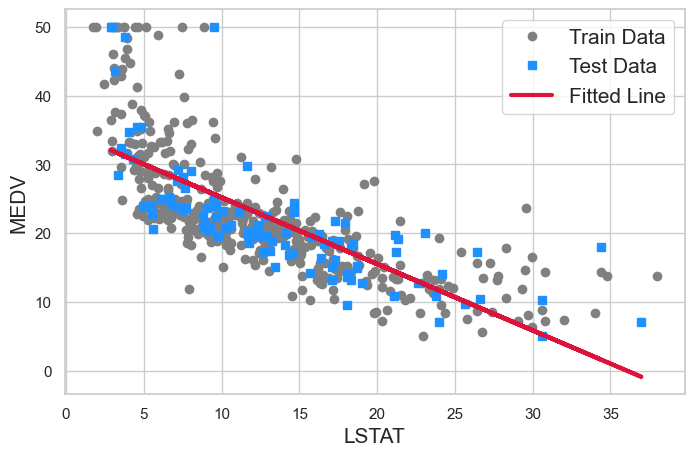

In [43]:
plt.figure(figsize=(8,5))

plt.plot(X_train, y_train, 'o', color='grey', label = 'Train Data')
plt.plot(X_test, y_test, 's', lw=3, color='dodgerblue', label='Test Data' )
plt.plot(X_test, y_pred, '-', lw=3, color='crimson', label='Fitted Line' )
plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.show()

In [44]:
y_pred.shape,y_test.shape,X_test.shape,X_train.shape

((102, 1), (102, 1), (102, 1), (404, 1))

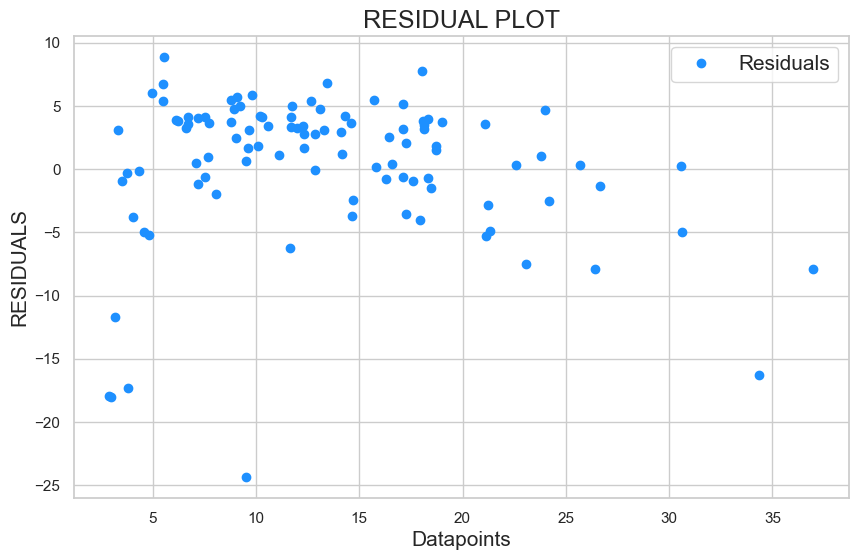

In [45]:
residuals = y_pred - y_test  # also called as error terms

plt.figure(figsize=(10,6))

plt.plot(X_test, residuals, 'o', color='dodgerblue', label = 'Residuals')

plt.xlabel('Datapoints', fontsize=15)
plt.ylabel('RESIDUALS', fontsize=15)
plt.title('RESIDUAL PLOT', fontsize=18)
plt.legend(loc=1, fontsize=15)
plt.show()

In [46]:
residuals = y_pred - y_test

SS_Res = np.sum(residuals**2)   # Sum of the squares of the Residuals

SS_tot = np.sum( (y_test - y_test.mean())**2  )  # Total Sum of squares of the variances of y

1 - (SS_Res/SS_tot)

0.5429180422970386

In [47]:
LR.score(X_train,y_train)

0.5423180734793516

In [48]:
LR.score(X_test,y_test)

0.5429180422970386

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5429180422970386

In [94]:
# np.polyfit function can be used only with a SINGLE FEATURE
p2 = np.poly1d(np.polyfit(X_train.flatten(),y_train.flatten(), 2))
print(p2)

         2
0.04597 x - 2.416 x + 43.44


In [53]:
y_pred2 = p2(X_test)
r2_score(y_test, y_pred2)

0.6268727686008044

In [55]:
dummy_X = np.linspace(X.min(), X.max(), 100)
y_pred2 = p2(dummy_X)

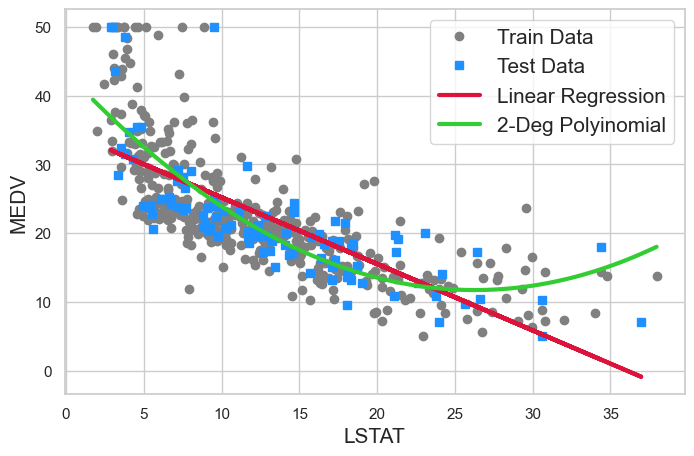

In [56]:
plt.figure(figsize=(8,5))

plt.plot(X_train, y_train, 'o', color='gray', label = 'Train Data')
plt.plot(X_test, y_test, 's', color='dodgerblue', label = 'Test Data')
plt.plot(X_test, y_pred, '-', lw=3, color='crimson', label='Linear Regression' )
plt.plot(dummy_X, y_pred2, '-', lw=3, color='limegreen', label='2-Deg Polyinomial' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.show()

## Polynomial Modelling

In [ ]:
# There is NO function/class for Polynomial Fitting in sklearn.
# Instead, We'll create Polynomial Features (Feature Engineering), then do simply Linear Reg!!

# y^ = w0 + w1X1 + w2X1^2 + w3X1^3 + ....

In [57]:
X_train[:5]

array([[24.91],
       [ 8.47],
       [ 7.83],
       [23.29],
       [11.28]])

In [ ]:
# PolynomialFeatures >>> Transformer class

# All Transformers, Scalers, & Encoders in sklearn have:
# - fit() >>> "fitting" means learning something from the Data (Feature)
# ("fit" methods prepares the trasnformer/scaler/encoder)

# - transform() >>>  This is the actual function which does the data transformation 
# (during the transformation we might need the info extracted/learnt during the fit() method call ).
# For this reason, you CANNOT call the transform method directly.. or before the fit().

# - fit_transform(): Back-toback fit(), followed by transform()

# - inverse_transform() (some of them)

In [ ]:
# np.random.seed(100)
# X1 = np.random.rand(10, 3).round(2)
# X1

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly3 = PolynomialFeatures(degree=3, include_bias=False) # create the polynomial tranformer object

In [70]:
poly3.fit(X_train)    # Train the Polynomial transformer object 

PolynomialFeatures(degree=3, include_bias=False)

In [71]:
poly3.powers_

array([[1],
       [2],
       [3]], dtype=int64)

In [72]:
poly3.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3'], dtype=object)

In [73]:
X_train[:5]

array([[24.91],
       [ 8.47],
       [ 7.83],
       [23.29],
       [11.28]])

In [74]:
polyX = poly3.transform(X_train)  # these the polynomial features created
polyX[:5]
# (X**0)1,               X**1              X**2                X**3

array([[2.49100000e+01, 6.20508100e+02, 1.54568568e+04],
       [8.47000000e+00, 7.17409000e+01, 6.07645423e+02],
       [7.83000000e+00, 6.13089000e+01, 4.80048687e+02],
       [2.32900000e+01, 5.42424100e+02, 1.26330573e+04],
       [1.12800000e+01, 1.27238400e+02, 1.43524915e+03]])

In [75]:
polyX.shape

(404, 3)

In [76]:
X_train.shape

(404, 1)

In [77]:
polyX = poly3.fit_transform(X_train) # here I am doing the fit & transform together !!!
polyX.shape

(404, 3)

In [78]:
polyX_test = poly3.transform(X_test) # transforming the test set

In [79]:
PR3 = LinearRegression()  # are going to do Linear Regression on Polynomial Features 

PR3.fit(polyX, y_train)  # polynomial model is now got fitted  >> training the Poly model (extractuing the w's)

LinearRegression()

In [80]:
dummy_X = dummy_X.reshape(-1,1)
# poly3.transform(dummy_X)[:5]

In [82]:
y_pred1 = LR.predict(dummy_X)
y_pred3 = PR3.predict(poly3.transform(dummy_X)) # Transform the test data using 
# the "fitted" transformer/scaler object  

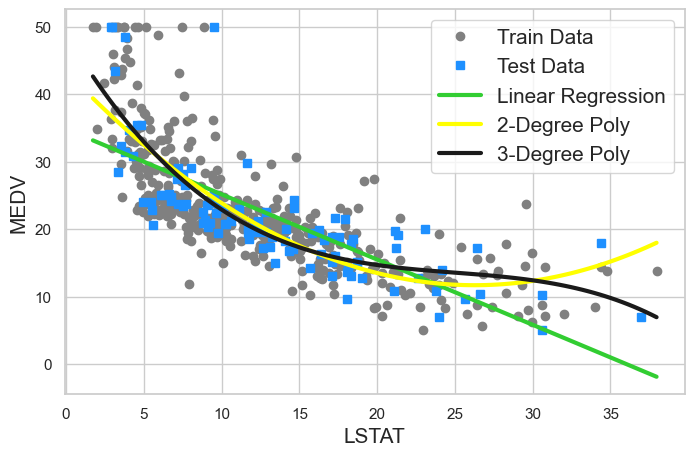

In [83]:
plt.figure(figsize=(8,5))

plt.plot(X_train, y_train, 'o', color='gray', label = 'Train Data')
plt.plot(X_test, y_test, 's', color='dodgerblue', label = 'Test Data')

plt.plot(dummy_X, y_pred1, '-', color='limegreen', lw=3, label='Linear Regression' )
plt.plot(dummy_X, p2(dummy_X), '-', color='yellow', lw=3, label='2-Degree Poly' )
plt.plot(dummy_X, y_pred3, '-', color='k', lw=3, label='3-Degree Poly' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [84]:
PR3.intercept_, PR3.coef_

(array([48.92897017]),
 array([[-3.88721057e+00,  1.48318736e-01, -1.97659036e-03]]))

In [85]:
PR3.score(polyX, y_train)   # R2 for 3-degree model

0.6568861406920818

In [86]:
PR3.score(polyX_test, y_test)   # R2 for 3-degree model

0.655219629080021

### Overfitting

In [95]:
0.3 - 0.2 - 0.1

-2.7755575615628914e-17

In [87]:
X_train.shape   # max poly degree possible for this dataset ??
# Theoretically ??? >> upto N-1 degree we can go 
# Technically ??? >>> upto that degree which doesn't lead to overfitting

(404, 1)

In [ ]:
# With pipelines, the entire machine learning workflow can be easily replicated and scaled to 
# handle large datasets. Pipelines can also be used for model deployment, 
# allowing for a seamless transition from model development to production.


# Reasons to use Pipelines:
# 1. ....................
# 2. Chaining of multiple steps make it easy  (organizing workflow)
# 3. Consistency of operations is ensured
# 4. Same steps in the same sequence can be applied to the TEST SET also !!!
# 5. Saving memory (RAM) by NOT SAVING the outputs of the intermediate steps
# 6. Code reuse becomes easy.

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(degree=12, include_bias=False), LinearRegression())

In [97]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=12, include_bias=False)),
                ('linearregression', LinearRegression())])

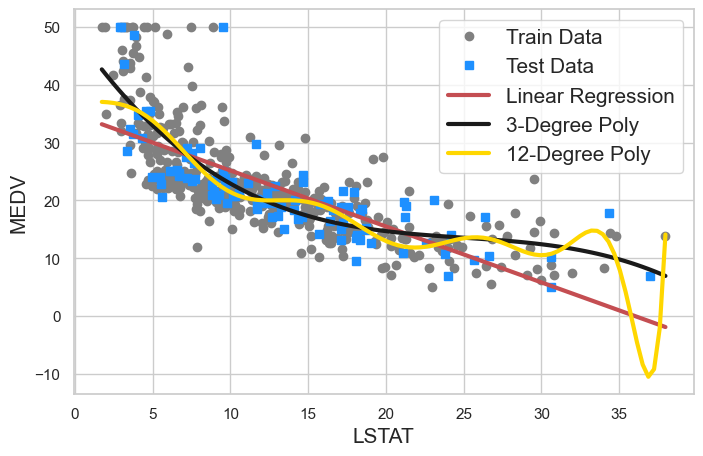

In [98]:
plt.figure(figsize=(8,5))

plt.plot(X_train, y_train, 'o', color='gray', label = 'Train Data')
plt.plot(X_test, y_test, 's', color='dodgerblue', label = 'Test Data')

plt.plot(dummy_X, y_pred1, 'r-', lw=3, label='Linear Regression' )
plt.plot(dummy_X, y_pred3, '-', color='k', lw=3, label='3-Degree Poly' )
plt.plot(dummy_X, pipeline.predict(dummy_X), '-', color='gold', lw=3, label='12-Degree Poly' )

# plt.plot(X, y_pred_train, 'o', color='y', lw=3, label='15-Degree Poly' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [100]:
pipeline.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=12, include_bias=False),
 'linearregression': LinearRegression()}

In [101]:
pipeline['linearregression'].coef_   # unregularised 12-degree model coefficients

array([[-5.89494669e-06, -8.54538372e-05, -3.55506937e-04,
        -1.61497541e-03, -4.01869513e-03,  1.16891274e-03,
        -1.39510190e-04,  9.08268407e-06, -3.49479269e-07,
         7.95411460e-09, -9.92066512e-11,  5.23366480e-13]])

In [104]:
np.finfo(float).eps  # This is the resolution of your machine

2.220446049250313e-16

In [105]:
0.3 - 0.2 - 0.1

-2.7755575615628914e-17

In [106]:
pipeline['linearregression'].intercept_

array([37.07806495])

In [107]:
X_train.shape

(404, 1)

In [108]:
# r2_score()

In [118]:
train_r2 = []
test_r2 = []

for deg in range(1,20):
    pipeline = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
#     pipeline.fit(X, y)
#     r2.append(r2_score(y, pipeline.predict(X)))
    
    pipeline.fit(X_train, y_train)
    train_r2.append(r2_score(y_train, pipeline.predict(X_train)))
    test_r2.append(r2_score(y_test, pipeline.predict(X_test)))
    

In [119]:
test_r2

[0.5429180422970386,
 0.6268727686008047,
 0.655219629080021,
 0.6705992546031907,
 0.6866010101320529,
 0.6894147675796138,
 0.6821449120685437,
 0.6817009269733907,
 0.6879462525500943,
 0.6818595791633001,
 0.6472967126781849,
 0.5813205099404508,
 0.44058156167686957,
 -1.0175481450012551,
 -2.1091090077044647,
 -3.4507002491568493,
 -4.9720374170497745,
 -6.932616581721051,
 -9.822680622902796]

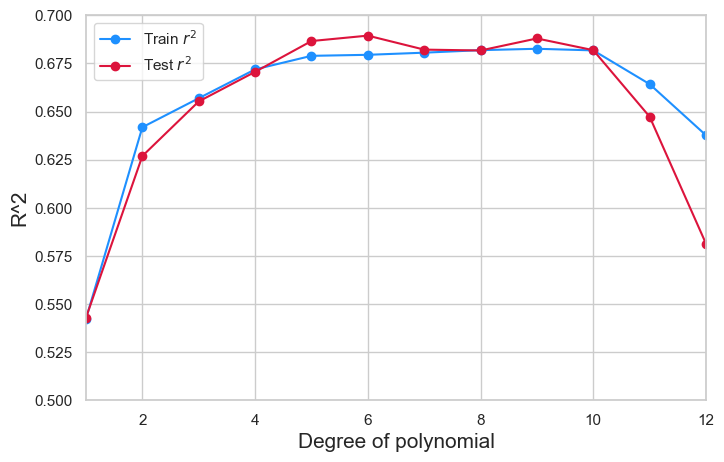

In [123]:
plt.figure(figsize=(8,5))

plt.plot(list(range(1,20)), train_r2, 'o-', color='dodgerblue', label="Train $r^2$")
plt.plot(list(range(1,20)), test_r2, 'o-', color='crimson', label="Test $r^2$")

plt.xlabel('Degree of polynomial', fontsize=15)
plt.ylabel('R^2', fontsize=15)
plt.xlim([1, 12])
plt.ylim([0.5, 0.7])

plt.legend()
plt.show()

In [ ]:
X.shape

In [124]:
# Split your data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 1), (102, 1))

In [125]:
y_train.shape, y_test.shape

((404, 1), (102, 1))

In [ ]:
# Ways to prevent your model from overfitting
# Regularization (for Linear Reg, Log. reg, SVR, Dense layers in ANN)
# Early Stopping (for algo which implement some sort of Gradient Descent for learning)
# Pruning (for Tree-based models, e.g. decission trees, RF, XGBoost etc..)
# Feature Selection (RFE, SelectKBest, FFS, etc..)
# Dimensionality Reduction using Feature Transformation tech. (PCA, SVD, LDA etc.)
# Increase the amount of data (rows) you have using Data Augmentation (only for DL, not for ML)

# Crossvalidation ???

# Regularization

Regularization is a technique used in machine learning and statistics to prevent overfitting of a model on the training data, improve generalization to new data, and handle issues of multicollinearity and feature selection. It achieves this by adding a penalty term to the loss function used to train the model. The primary forms of regularization include L1 (Lasso), L2 (Ridge), and Elastic Net.

### L1 Regularization (Lasso):
- **Mechanism**: L1 regularization adds a penalty equal to the absolute value of the magnitude of coefficients. The penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter.
- **Loss Function**: $L = \text{Loss}(y, \hat{y}) + \lambda \sum |w_i|$ where $w_i$ are the coefficients.
- **Effect**: It can lead to sparse solutions where some coefficients can become zero, effectively selecting a simpler model with fewer variables.
- **Usage**: Ideal for feature selection in models with high dimensionality.

### L2 Regularization (Ridge):
- **Mechanism**: L2 regularization adds a penalty equal to the square of the magnitude of coefficients. The penalty term is the sum of the squared values of the coefficients multiplied by a regularization parameter.
- **Loss Function**: $L = \text{Loss}(y, \hat{y}) + \lambda \sum w_i^2$
- **Effect**: It shrinks the coefficients toward zero but does not set any to zero, which means it includes all features but does not allow the coefficients to become too large.
- **Usage**: Useful in cases where there is multicollinearity in data or when you want to keep all variables in the model.

### Elastic Net:
- **Mechanism**: Elastic Net is a middle ground between L1 and L2 regularization. It adds both penalties to the loss function.
- **Loss Function**: $L = \text{Loss}(y, \hat{y}) + \lambda_1 \sum |w_i| + \lambda_2 \sum w_i^2$
- **Effect**: It combines the feature selection property of L1 with the regularization strength of L2.
- **Usage**: Beneficial when there are multiple features that are correlated.

### Key Points:
- **Regularization Parameter ($\lambda$)**: Controls the strength of the regularization. A higher value increases the penalty, and a value of zero means no regularization.
- **Bias-Variance Tradeoff**: Regularization can increase bias but reduce variance, helping with the overall model performance on unseen data.
- **Overfitting Reduction**: By adding complexity constraints, regularization techniques help prevent the model from fitting the noise in the training data.

Regularization is a critical concept in machine learning, widely used in various models, including linear regression, logistic regression, and neural networks. It helps to improve model robustness and interpretability.

## Here's a comparison of Ridge, Lasso, and Elastic Net in a tabular format:

| **Feature**               | **Ridge Regression (L2)**                                                                                               | **Lasso Regression (L1)**                                                                                                | **Elastic Net**                                                                                                                                          |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Penalty Term**          | $\lambda \sum w_i^2$(Sum of the squares of the coefficients)                                                          | $\lambda \sum |w_i|$(Sum of the absolute values of the coefficients)                                                | Combination of L1 and L2: $\lambda_1 \sum |w_i| + \lambda_2 \sum w_i^2$                                                                              |
| **Coefficient Shrinkage** | Coefficients are shrunk towards zero but typically none are exactly zero.                                               | Coefficients can be shrunk to exactly zero, leading to exclusion of some variables.                                    | Balances between the L1 and L2 effects, shrinking some coefficients to zero and others towards zero.                                                    |
| **Feature Selection**     | Does not perform feature selection (all features are kept in the model).                                                | Performs feature selection (some features can be completely removed).                                                  | Can perform feature selection like Lasso, but tends to keep more features like Ridge.                                                                    |
| **Use Cases**             | - Large number of predictors.<br>- Predictors are correlated.<br>- Avoiding the exclusion of any variable.              | - Large number of features, with only a few expected to be important.<br>- Models where interpretability is important. | - Large number of correlated features.<br>- Balancing feature selection with regularization.<br>- When predictors are more than observations.          |
| **Model Complexity**      | Less complex than Lasso and Elastic Net in terms of feature selection.                                                  | Simplifies the model by reducing the number of features.                                                              | More complex due to the combination of two penalty terms.                                                                                                |
| **Multicollinearity**     | Handles multicollinearity well by distributing coefficients among correlated predictors.                               | May not perform well with multicollinearity as it might retain only one variable from a group of correlated variables. | Handles multicollinearity better than Lasso by keeping correlated variables together and performs better feature selection than Ridge.                  |
| **Bias-Variance Tradeoff**| Higher bias but lower variance compared to Lasso. Good for models where all variables are considered important.        | Lower bias but can have higher variance, especially if the wrong features are excluded.                                | Balances bias and variance, often leading to better overall model performance.                                                                          |
| **Interpretability**      | Less interpretable due to inclusion of all variables.                                                                   | More interpretable due to sparsity (fewer variables).                                                                  | Moderately interpretable depending on the balance of L1 and L2 penalties and the resulting sparsity of the model.                                       |

This table outlines the primary differences between the three regularization techniques. The choice among them depends on the specific characteristics and requirements of your data and the problem you are addressing.

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/05/complete-guide-to-regularization-techniques-in-machine-learning/
# https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
#Without regularization
PR12 = make_pipeline(PolynomialFeatures(degree=12, include_bias=False), LinearRegression())
PR12.fit(X_train, y_train)


In [ ]:
#Train score without regularization
train_score = PR12.score(X_train, y_train)
train_score

In [ ]:
#Train score without regularization
test_score=PR12.score(X_test, y_test) 
test_score


<h5> Ridge </h5>

In [ ]:
# Now making  a pipeline with PolynomialFeatures and Ridge Regressio
ridge= make_pipeline(PolynomialFeatures(degree=12, include_bias=False),Ridge(alpha=3))  # try with 1 & 3


In [ ]:
ridge.fit(X_train, y_train)  # TRAIN THE RIDGE USING TRAIN SET
y_ridge = ridge.predict(X_test)  # Ridge Model's predictions on the TEST SET

coefficients = ridge.named_steps['ridge'].coef_ #Coefficient of Ridge
intercept = ridge.named_steps['ridge'].intercept_ #intercept of Ridge model

coefficients,intercept


In [ ]:
train_ridge_score= ridge.score(X_train, y_train)   # score of the RIDGE model on TRAIN SET
train_ridge_score

In [ ]:
test_ridge_score=ridge.score(X_test, y_test)   # score of the RIDGE model on TEST
test_ridge_score

In [ ]:
dummy_X = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
dummy_X.shape

In [ ]:
# plt.figure(figsize=(10,8))
plt.plot(X_train, y_train, 'o', color='grey', label = 'Train')
plt.plot(X_test, y_test, 's', color='dodgerblue', label = 'Test Data')
plt.plot(dummy_X, PR3.predict(poly3.transform(dummy_X)), '-', color='k', lw=3, label='3-Degree Poly' )
plt.plot(dummy_X, PR12.predict(dummy_X), '-', color='gold', lw=3, label='Un-Reg 12-Degree Poly' )
plt.plot(dummy_X, ridge.predict(dummy_X), '-', color='limegreen', lw=3, label='Ridge Regul' )

# plt.plot(X, y_pred_train, 'o', color='y', lw=3, label='15-Degree Poly' )

plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(fontsize=15)
plt.show()

<h5>Lasso</h5>

In [ ]:
# Now making  a pipeline with PolynomialFeatures and Lasso Regression

lasso = make_pipeline(PolynomialFeatures(degree=12, include_bias=False),Lasso(alpha= 0.5))
lasso

In [ ]:
lasso.named_steps

In [ ]:
lasso.fit(X_train, y_train)  # TRAIN THE Lasso USING TRAIN SET
y_lasso = lasso.predict(X_test)  # Lasso Model's predictions on the TEST SET

coefficients = lasso.named_steps['lasso'].coef_ #Coefficient of Lasso
intercept = lasso.named_steps['lasso'].intercept_ #intercept of Lasso model

coefficients


In [ ]:
train_Lasso_score= lasso.score(X_train, y_train)   # score of the Lasso model on TRAIN SET
train_Lasso_score

In [ ]:
test_Lasso_score= lasso.score(X_test, y_test)   # score of the Lasso model on Test SET
test_Lasso_score

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(X_train, y_train, 'o', color='grey', label = 'Train')
plt.plot(X_test, y_test, 's', color='dodgerblue', label = 'Test Data')
plt.plot(dummy_X, PR3.predict(poly3.transform(dummy_X)), '-', color='k', lw=3, label='3-Degree Poly' )
plt.plot(dummy_X, PR12.predict(dummy_X), '-', color='gold', lw=3, label='Un-Reg 12-Degree Poly' )
plt.plot(dummy_X, lasso.predict(dummy_X), '-', color='limegreen', lw=3, label='Ridge Regul' )


plt.xlabel('LSTAT', fontsize=15)
plt.ylabel('MEDV', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

alpha_values = [1e-5, 1e-4, 0.001, 0.005, 0.01, 0.1, 0.5, 1, 5, 10]
param_grid = {'lasso__alpha': alpha_values}

# lasso = Lasso()
kfold = KFold(n_splits=5, shuffle=True, random_state=5)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=kfold, verbose=1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

## Statistical Validation of Linear Regresion Model

In [ ]:
X.shape

In [ ]:
LR.intercept_, LR.coef_

In [ ]:
# !pip uninstall statsmodels
# !pip install statsmodels


In [ ]:
import statsmodels.api as sm
import numpy as np
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [ ]:
print(results.summary())

# For the Model
# H0: There is no linear relationship between X & y (model is irrelevant)
# HA: There is Indeeed a linear relationship between X & y

# Prob (F-statistic): prob in the favor of the H0


# For the Model Coeff (in the variable)
# H0: This indep variable is useless to the model
# HA: This indep variable is important to the model


<h3> Multivariate </h3>

In [ ]:
# df = pd.read_csv(r"BostonHousing.csv")
X = df.drop('medv', axis=1)
y = df['medv']

In [ ]:
X.shape, y.shape

In [ ]:
# Split your data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

In [ ]:
LR.score(X_test, y_test)

In [ ]:
LR.intercept_, LR.coef_

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())